In [1]:
import numpy as np
import pandas as pd
import random
from collections import defaultdict
import gym
import gym_minigrid
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class SARSA:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.01
        self.gamma = 0.9
        self.epsilon = 0.2
        self.q_values = defaultdict(lambda: [0.0] * actions)
        
    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]
        
    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        
        q_value = self.q_values[state][action]
        
        ########################## Write Code ####################################
        next_q_value = self.q_values[next_state][next_action]
        td_error = reward + self.gamma * next_q_value - q_value
        self.q_values[state][action] = q_value + self.alpha*td_error
        return
        ###########################################################################
    def act(self, state):
        #################### Write epsilion greedy code ###########################
        if np.random.rand() < self.epsilon:
            action = np.random.randint(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = np.argmax(q_values)
        ###########################################################################
        return action

class QLearning(SARSA):
    def __init__(self, actions, agent_indicator=10):
        super().__init__(actions, agent_indicator)
        
    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        _ = next_action
        q_value = self.q_values[state][action]
        
        ########################## Write Code ####################################
        
        next_q_value = np.max(self.q_values[next_state])# max
        td_error = reward + self.gamma * next_q_value - q_value
        self.q_values[state][action] = q_value + self.alpha*td_error
        return
        ###########################################################################

In [3]:
from utils import gen_wrapped_env, show_video

## SARSA

In [4]:
env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')
#env = gen_wrapped_env('MiniGrid-DoorKey-5x5-v0')

obs = env.reset()

agent_position = obs[0]

agent = SARSA(3, agent_position)

In [ ]:
rewards = []
for ep in range(500000):
    done = False
    obs = env.reset()
    action = agent.act(obs)
    
    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent.act(next_obs)
        agent.update(obs, action, reward, next_obs, next_action)
        
        ep_rewards += reward
        obs = next_obs
        action = next_action
    rewards.append(ep_rewards)
    if (ep+1) % 20 == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
env.close()

In [6]:
{s:np.round(q, 5).tolist() for s, q in agent.q_values.items()}

{0: [0.02938, 0.02957, 0.0355],
 3: [0.02661, 0.02643, 0.02969],
 15: [0.09, 0.08869, 0.09894],
 6: [0.02805, 0.02805, 0.03203],
 12: [0.05389, 0.05437, 0.06119],
 24: [0.07307, 0.07281, 0.08399],
 18: [0.11131, 0.11184, 0.12007],
 30: [0.24832, 0.24755, 0.26694],
 27: [0.18528, 0.18651, 0.21135],
 33: [0.2659, 0.26443, 0.29568],
 45: [0.0, 0.0, 0.0],
 21: [0.13682, 0.13723, 0.14684],
 9: [0.03128, 0.03136, 0.03761],
 36: [0.09024, 0.09058, 0.10805],
 39: [0.34939, 0.35156, 0.41938],
 42: [0.46954, 0.47349, 0.54423]}

In [7]:
show_video()

In [8]:
pd.Series(rewards).to_csv('./logs/rewards_sarsa.csv')

In [9]:
sarsa_logs = pd.read_csv('./logs/rewards_sarsa.csv', index_col=False).iloc[:, 1]
#q_logs = pd.read_csv('./logs/rewards_qlearning.csv', index_col=False).iloc[:, 1]

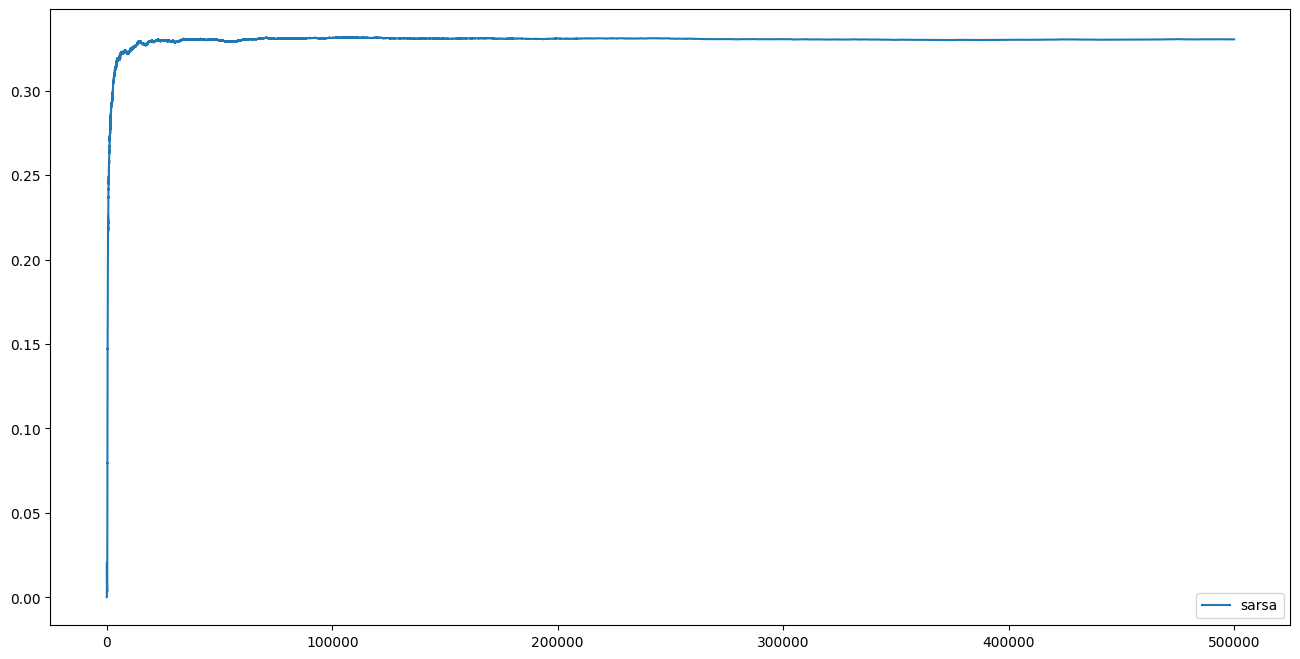

In [10]:
plt.figure(figsize=(16, 8))
plt.plot(sarsa_logs.cumsum() / (pd.Series(np.arange(sarsa_logs.shape[0]))+1), label="sarsa")
# plt.plot(sarsa_logs.cumsum() / (pd.Series(np.arange(sarsa_logs.shape[0]))+1), label="SARSA")
plt.legend()

## Q-Learning

In [18]:
obs = env.reset()

agent_position = obs[0]

agent_Q = QLearning(3, agent_position)

In [ ]:
rewards = []
for ep in range(500000):
    done = False
    obs = env.reset()
    action = agent_Q.act(obs)
    
    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent_Q.act(next_obs)
        agent_Q.update(obs, action, reward, next_obs, next_action)
        
        ep_rewards += reward
        obs = next_obs
        action = next_action
    rewards.append(ep_rewards)
    if (ep+1) % 20 == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
env.close()

In [20]:
{s:np.round(q, 5).tolist() for s, q in agent_Q.q_values.items()}

{0: [0.03425, 0.03434, 0.03507],
 3: [0.03228, 0.03222, 0.03505],
 15: [0.09564, 0.0954, 0.10442],
 12: [0.06023, 0.06023, 0.0606],
 27: [0.20202, 0.20148, 0.21545],
 39: [0.36552, 0.36559, 0.39412],
 6: [0.03506, 0.03499, 0.04016],
 18: [0.12492, 0.12543, 0.14684],
 30: [0.2633, 0.26326, 0.3093],
 33: [0.31614, 0.31421, 0.38737],
 24: [0.08132, 0.08099, 0.08408],
 9: [0.03992, 0.03974, 0.04996],
 21: [0.16067, 0.1608, 0.20672],
 36: [0.08657, 0.08638, 0.09513],
 45: [0.0, 0.0, 0.0],
 42: [0.48845, 0.49072, 0.51952]}

In [21]:
show_video()

In [22]:
pd.Series(rewards).to_csv('./logs/rewards_qlearning.csv')

In [23]:
q_logs = pd.read_csv('./logs/rewards_qlearning.csv', index_col=False).iloc[:, 1]

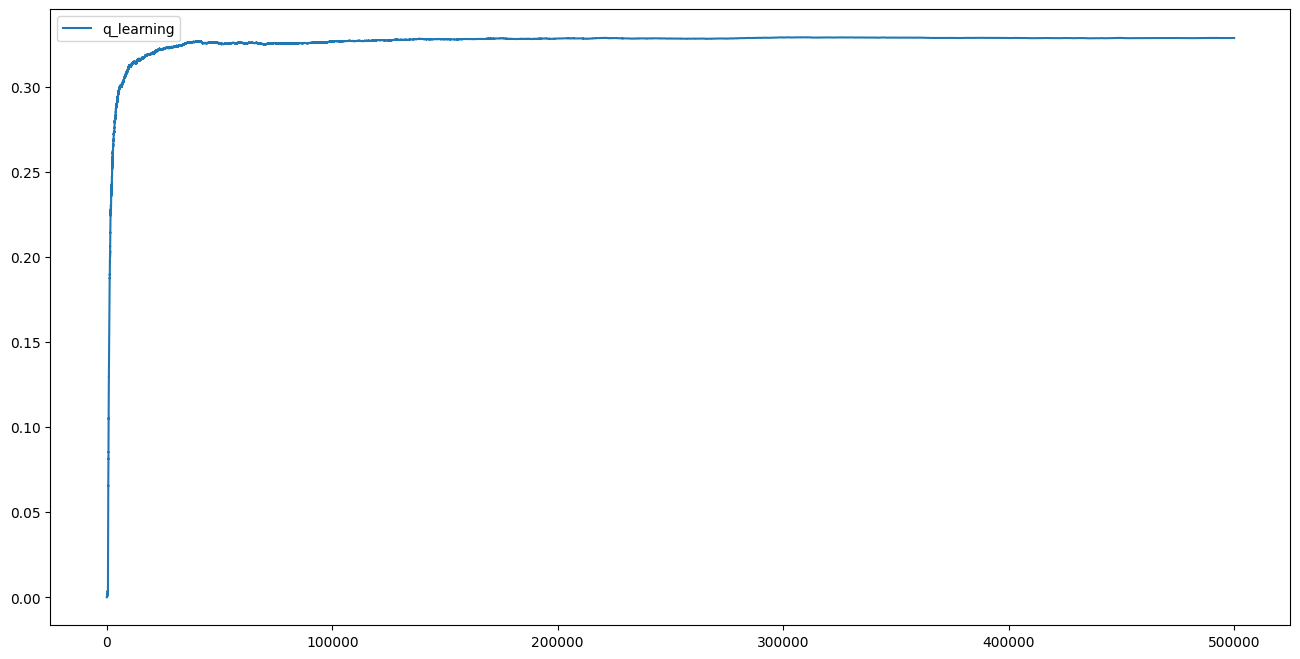

In [24]:
plt.figure(figsize=(16, 8))
plt.plot(q_logs.cumsum() / (pd.Series(np.arange(q_logs.shape[0]))+1), label="q_learning")
plt.legend()